If any one had problems with data files I have uploaded, below there is original link I used to get them:
https://archive.ics.uci.edu/ml/datasets/Adult

After downloading please only change name of the file "adult.names" into "adult_descr".
We start with uploading basic libraries.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Data Import

In [2]:
data = pd.read_csv('../input/adult-census-income-data/adult_data.csv')   ##import data
data_descr = pd.read_csv('../input/adult-census-income-data/adult_descr.csv', sep=':')

Let us see how the data looks like. Firstly one can see we do not have correct headers by default in the below. To get correct ones we can use the file data_descr.

In [3]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data_descr   ## data descrption.

,| This data was extracted from the census bureau database found at
| http,//www.census.gov/ftp/pub/DES/www/welcome.html
| Donor,"Ronny Kohavi and Barry Becker,"
| Data Mining and Visualization,NaN
| Silicon Graphics.,NaN
| e-mail,ronnyk@sgi.com for questions.
...,...
sex,"Female, Male."
capital-gain,continuous.
capital-loss,continuous.
hours-per-week,continuous.


We take last 15 rows of data_descr to get headers. Moreover the first element from the list has to be moved on the last position to fit with the order of columnns in the data file.

In [5]:
data_names = data_descr.tail(15)
names = list(data_names.index)

## move the first column on the last position
names.append(names[0])
names = names[1:]

Now we can import the data again using known headers and start processing.

In [6]:
data = pd.read_csv('../input/adult-census-income-data/adult_data.csv', names=names)
data = data.rename(columns={'>50K, <=50K.': 'money'})
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. The first touch of our dataset

We start with the first observation, to find out what is the frequency of our labels. 

In [7]:
money_group = data.groupby(by='money').count()
less_than_50k = str(np.round(money_group.age[0]/len(data) * 100, 2))+' %'
greater_than_50k = str(np.round(money_group.age[1]/len(data) * 100, 2))+' %'

In [8]:
print('Due to the data', less_than_50k, 'of people earn less than 50K, and only', greater_than_50k, 'do more than 50K.')

Due to the data 75.92 % of people earn less than 50K, and only 24.08 % do more than 50K.


Let us see how looks the distribution of the age in our database. The more it looks like the natural distribution, the more is possibility the data is representative.

In [9]:
age_count = data.groupby(by='age').count()
age_unique_list = list(age_count.index)

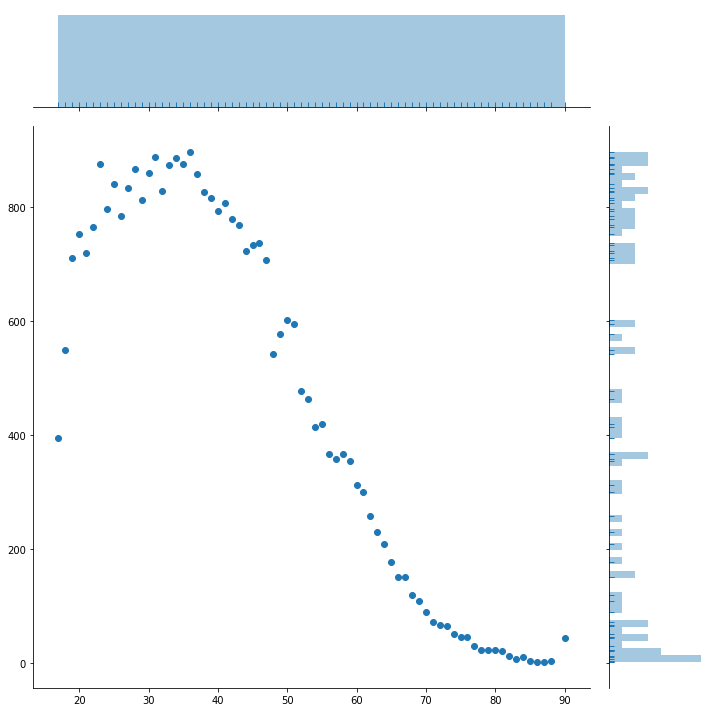

In [10]:
sns.jointplot(x=age_unique_list, y=age_count.values[:, 0], height=10, marginal_kws=dict(bins=len(age_count), rug=True), kind='scatter')

No we can start observe how each feature implies on the amount of money one can generate annualy. We start with comparing features from the Education category using a simple barplot. We take concerned columns, then group and count vaules with the respect to education categories and belonging into one of two groups of earning.

In [11]:
educ_money = data[['education', 'money']]
less = educ_money[educ_money['money']==' <=50K'].groupby('education', as_index=False).count()
more = educ_money[educ_money['money']==' >50K'].groupby('education', as_index=False).count()
merge = more.merge(less, on='education', how='right', sort=True)
merge = merge.rename(columns={'education': 'Education', 'money_x': 'More than 50K', 'money_y': 'Less than 50K'})
#merge

In [12]:
merge_melted = merge.melt(id_vars='Education').rename(columns=str.title)
#merge_melted

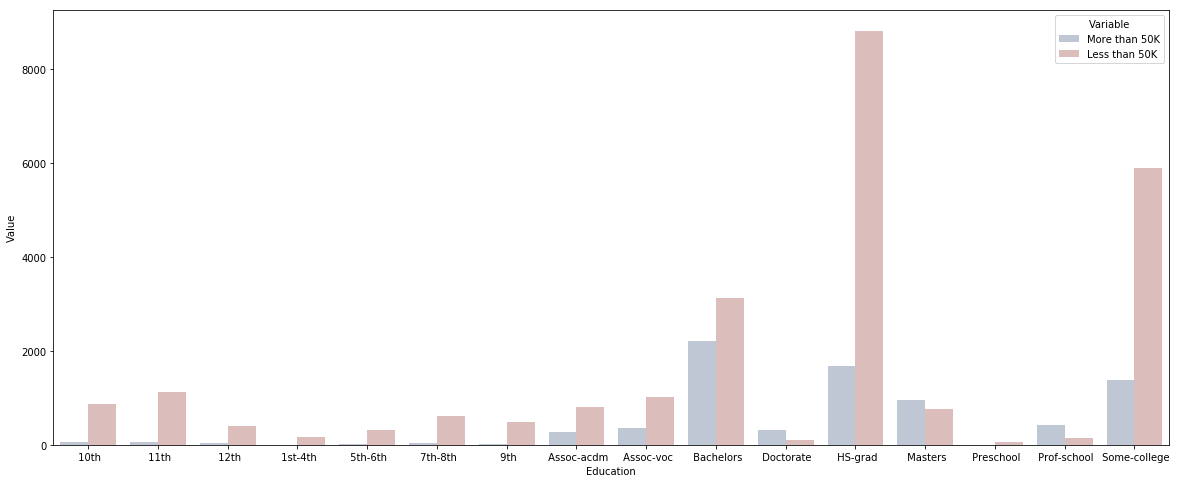

In [13]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Education', y='Value', data=merge_melted, hue='Variable', palette='vlag')

On the above plot one can see that people with education higher or equal to high school are able to earn more than 50K money. Furthermore only three groups: Doctorate, Masters and Prof-school, contain more pepole earning more than 50K, than people who generate less.

Below there are also plots concerned marital status, race and relationship. Instead of barplot we use vilolinplots to see all dependencies in more geometrical way. 

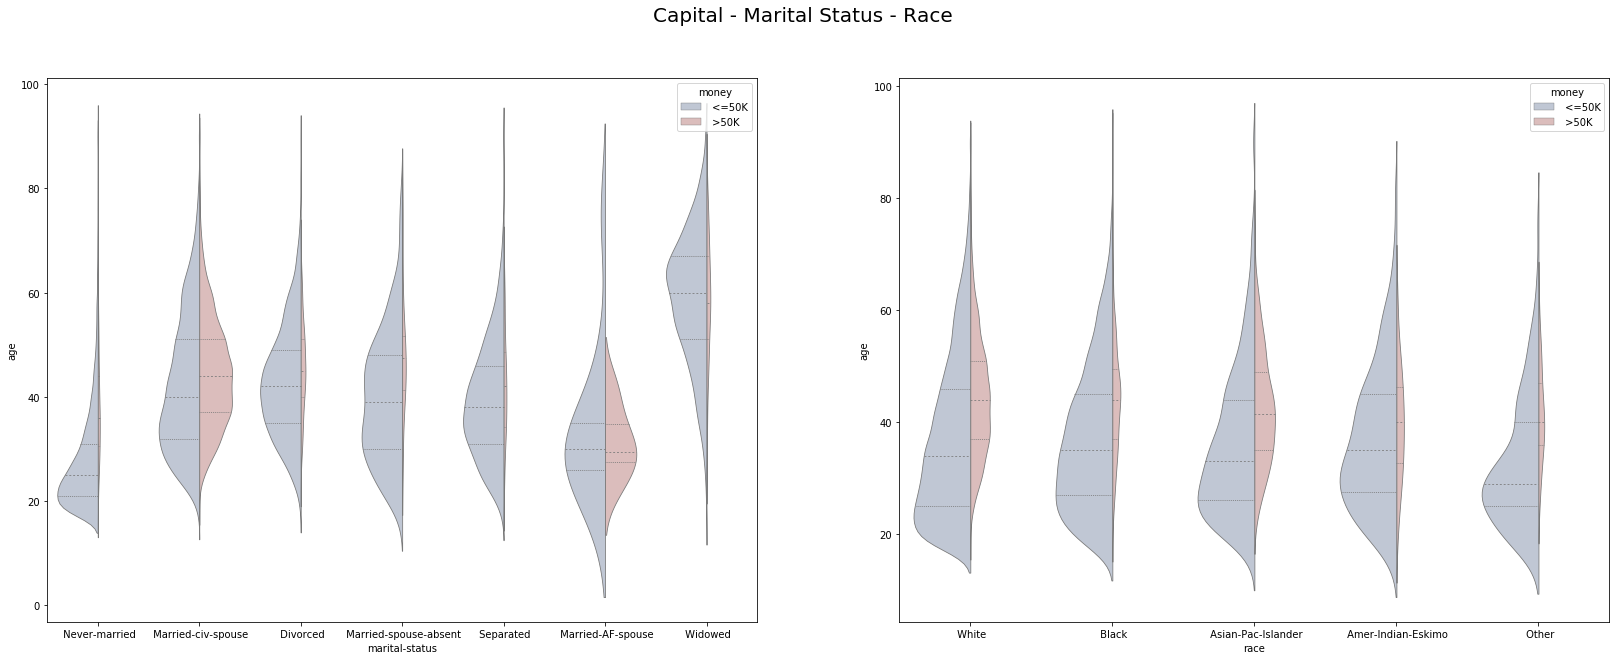

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
f.suptitle('Capital - Marital Status - Race', fontsize=20)
sns.violinplot(data=data,
               x="marital-status",
               y="age",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax1, cut=2)
sns.violinplot(data=data,
               x="race",
               y="age",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax2)

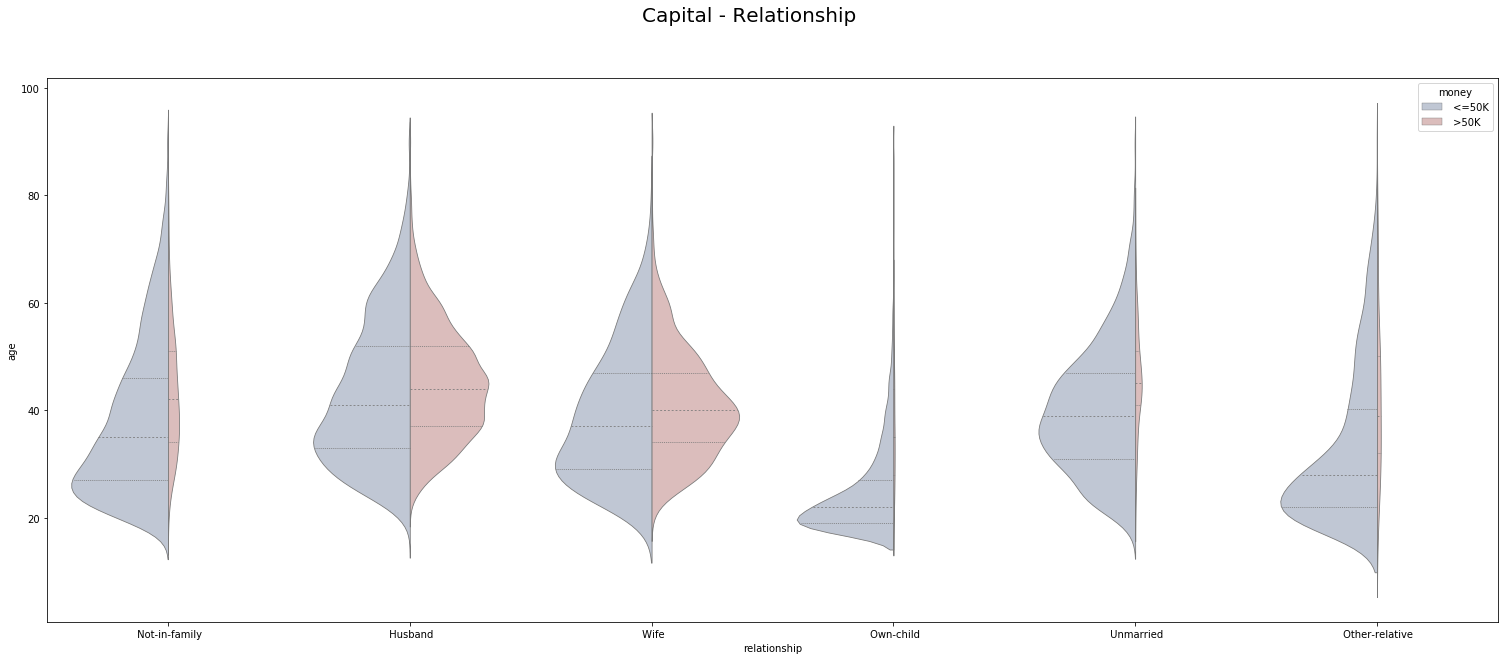

In [15]:
f, ax = plt.subplots(1, figsize=(26, 10))
f.suptitle('Capital - Relationship', fontsize=20)
sns.violinplot(data=data,
               x="relationship",
               y="age",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax, cut=2)

# 3. Data Processing (1)

In [16]:
train = data.drop(columns=['relationship', 'education', 'education-num', 'marital-status', 'workclass'])
labels = data['money']

In [17]:
train.head()

,age,fnlwgt,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,77516,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,83311,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,215646,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,234721,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,338409,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


We create new columns as below to get numerical values for each category. I tried to simplify that, therefore there are categories with few feateures assigned to the one numerical value. For example in the Education column, all feateures from 1st to 12th are assigned to zero. Moreover 

In [18]:
train['Relationship_Num'] = data['relationship'].map(dict(zip(list(np.unique(data['relationship'])), [0, 1, 2, 3, 4, 0])))
train['Education_Num'] = data['education'].map(dict(zip(list(np.unique(data['education'])), [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 4, 0, 5, 0])))
train['Marital_Status_Num'] = data['marital-status'].map(dict(zip(list(np.unique(data['marital-status'])), [0, 1, 1, 1, 2, 0, 3])))
train['Workclass_Num'] = data['workclass'].map(dict(zip(list(np.unique(data['workclass'])), [np.nan, 0, 0, 1, 2, 2, 2, 0, 1])))
train['sex'] = data['sex'].map(dict(zip(list(np.unique(data['sex'])), [0, 1])))  #1 - male, 0 - female
train['race'] = data['race'].map(dict(zip(list(np.unique(data['race'])), list(range(len(data.groupby(by=['race']).count().iloc[:,0]))))))
train['Occupation_Num'] = data['occupation'].map(dict(zip(list(np.unique(data['occupation'])), list(range(len(data.groupby(by=['occupation']).count().iloc[:,0]))))))
train['Occupation_Num'] = train['Occupation_Num'].replace({0: np.nan})

Some numerical features are grouped as below to get better interpretation at the end. That is easier to classified that three men are between 40 and 50 years old, then looking on three independent amounts in same range.

In [19]:
train['HrsBand'] = pd.cut(data['hours-per-week'], 5)
train['HrsBand_Num'] = pd.cut(data['hours-per-week'], 5, labels=list(range(len(train.groupby(by=['HrsBand']).count().iloc[:,0]))))
train['AgeBand'] = pd.cut(data['age'], 5)
train['Age_Num'] = pd.cut(data['age'], 5, labels=list(range(len(train.groupby(by=['AgeBand']).count().iloc[:,0]))))

Finally, we can take all countries from the native-country column and assign them into six categories: A - Asia, Am-S - South America, Am-N - North America, Am-M - Middle America, E - Europe, O - Other,

In [20]:
countries= np.unique(train['native-country'])
countries = countries.tolist()

In [21]:
indexes = ['O', 'A', 'Am-N', 'A', 'Am-S', 'Am-M', 'Am-M', 'Am-S', 'Am-M', 'E', 'E', 'E', 'E', 'Am-M', 'Am-M', 'E', 'Am-M', 'A', 'E', 'A', 'A', 'E', 'E', 'Am-M', 'A', 'A', 'Am-M', 'Am-M', 'O', 'Am-S', 'A', 'E', 'E', 'Am-M', 'E', 'O', 'A', 'A', 'Am-S', 'Am-N', 'A', 'E']

In [22]:
## quick check that we did not miss anything
print(len(countries)==len(indexes))   

True


In [23]:
## create dictionary that assign each country to its continent
native_countries_dictionary = {a: b for a, b in zip(countries, indexes)}   

## crate new column with assigned continents
train['Continents'] = train['native-country'].map(native_countries_dictionary)  

## create new column with numerical values - each number represents assinged continent
train['Continents_Num'] = train['Continents'].map(dict(zip(list(np.unique(train['Continents'])), list(range(len(train.groupby(by=['Continents']).count().iloc[:,0]))))))    

Now we are almost ready to split the data into training, validation subsets.

In [24]:
## we delete all non-numerical columns
train_drop = train.drop(columns=['occupation', 'native-country', 'Continents', 'AgeBand', 'age', 'hours-per-week', 'HrsBand'])

## check length of the data before deleting NaN's
len(train_drop)

32561

In [25]:
## drop NaN's and check the lenght again
train_drop_na = train_drop.dropna()
len(train_drop_na)

30718

In [26]:
## change money features into numerical values: 0 - less than 50K, 1 - more than 50K
train_drop_na.money = train_drop_na.money.map(dict(zip(list(np.unique(labels)), [0, 1])))  

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
## change numerical values to int32 type
train_drop_na = train_drop_na.astype('int32')

In [28]:
train_drop_na.head()

,fnlwgt,race,sex,capital-gain,capital-loss,money,Relationship_Num,Education_Num,Marital_Status_Num,Workclass_Num,Occupation_Num,HrsBand_Num,Age_Num,Continents_Num
0,77516,4,1,2174,0,0,1,2,2,0,1,1,1,2
1,83311,4,1,0,0,0,0,2,1,2,4,0,2,2
2,215646,4,1,0,0,0,1,0,0,2,6,1,1,2
3,234721,2,1,0,0,0,0,0,1,2,6,1,2,2
4,338409,2,0,0,0,0,0,2,1,2,10,1,0,1


# 4. Data vs. Searching Characteristics

We can stop for the moment here before further processing. Now the data is of the form that helps to find best atributies that characterize people that are able to gain more money. Let us see what is the basic result once comparing only sex feature.

In [29]:
male_money = train_drop_na[train_drop_na.sex==1].groupby(by='money').count()
female_money = train_drop_na[train_drop_na.sex==0].groupby(by='money').count()

male_percent_low = np.round(male_money.sex.values[0]/male_money.sex.sum(),2)
male_percent_high = np.round(male_money.sex.values[1]/male_money.sex.sum(),2)
female_percent_low = np.round(female_money.sex.values[0]/female_money.sex.sum()*100,2)
female_percent_high = np.round(female_money.sex.values[1]/female_money.sex.sum()*100,2)

title = str(male_percent_high) + '% of males gain more than 50K, ' + str(male_percent_low) + '& males gain less. For women ' + str(female_percent_low) + '% of them gain less than 50K, ' + str(female_percent_high) + '% gain more.'
print(title)

0.31% of males gain more than 50K, 0.69& males gain less. For women 88.65% of them gain less than 50K, 11.35% gain more.


Let the above result will be a point of start. Only 11% of females earns more once taking all data.

In [30]:
best_attributies = train_drop_na[train_drop_na.sex==0]
best_attributies.shape

(9930, 14)

In [31]:
## take only wifes and husbands - they are assigned to 0 in column Relationship_Num
best_attributies = best_attributies[best_attributies.Relationship_Num==0]

## take only Masters - they are assigned to 4
best_attributies = best_attributies[best_attributies.Education_Num==4]

It's quite easy: wifes (can split outcomes on themselves and husbands) with Master Degree seem to be one of the best group to start looking for rich women. As one can see below, more than 83% of females gain more than 50K in this group.

In [32]:
female_money = best_attributies.groupby(by='money').count()

if len(female_money.sex.values)==2:
    female_percent_low = np.round(female_money.sex.values[0]/female_money.sex.sum() * 100,2)
    female_percent_high = np.round(female_money.sex.values[1]/female_money.sex.sum() *100 ,2)
    title = str(female_percent_low) + '% of women gain less than 50K, ' + str(female_percent_high) + '% gain more.'
    print(title)
else:
    print('100% of women gain more than 50K/year')

16.98% of women gain less than 50K, 83.02% gain more.


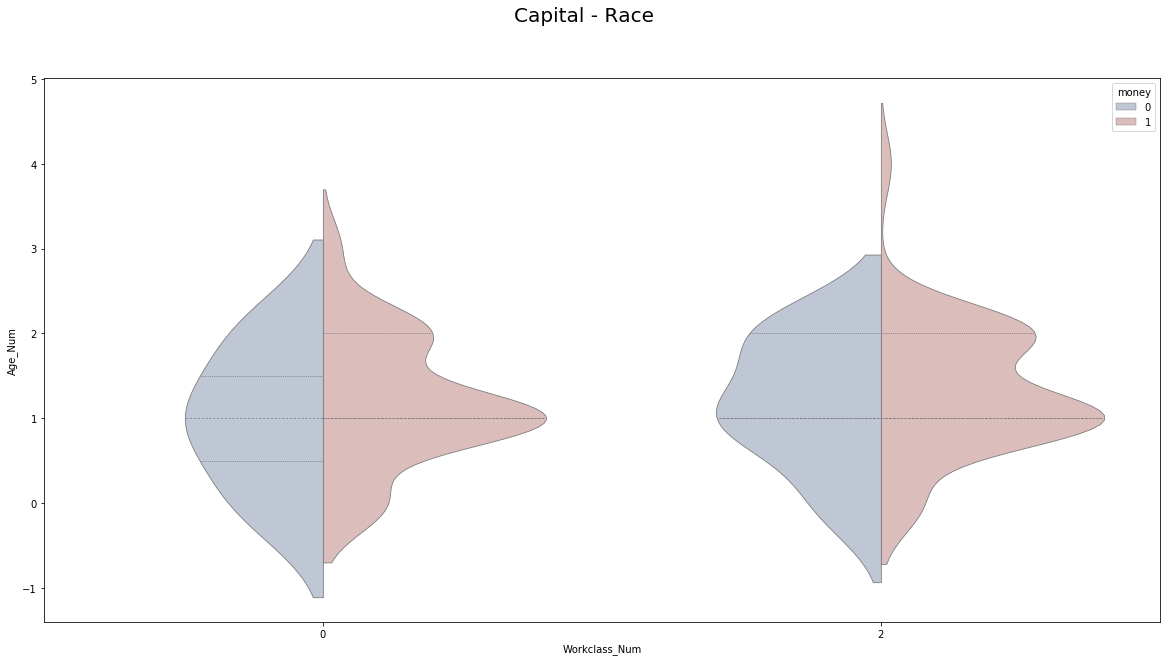

In [33]:
f, (ax) = plt.subplots(1, figsize=(20, 10))
f.suptitle('Capital - Race', fontsize=20)
sns.violinplot(data=best_attributies,
               x="Workclass_Num",
               y="Age_Num",
               inner="quartile",
               hue='money',
               scale="area",
               split=True, palette='vlag', linewidth=.8, ax=ax)

In [34]:
print(np.unique(data.workclass)[2])

 Local-gov


In [35]:
best_attributies = best_attributies[best_attributies.Workclass_Num==2]

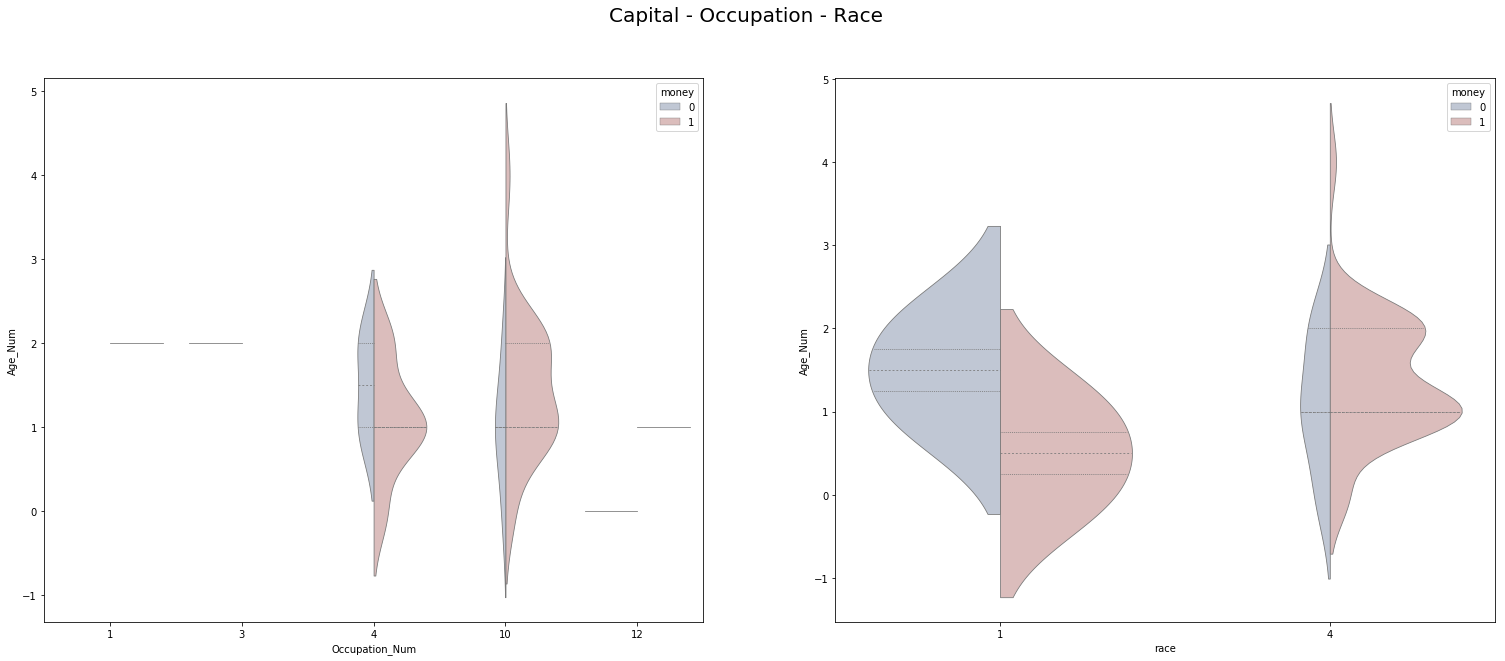

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 10))
f.suptitle('Capital - Occupation - Race', fontsize=20)
sns.violinplot(data=best_attributies,
               x="Occupation_Num",
               y="Age_Num",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax1, cut=2)
sns.violinplot(data=best_attributies,
               x="race",
               y="Age_Num",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax2)

In [37]:
print(np.unique(data.occupation)[10])
best_attributies = best_attributies[best_attributies.Occupation_Num==10]

 Prof-specialty


In [38]:
female_money = best_attributies.groupby(by='money').count()

if len(female_money.sex.values)==2:
    female_percent_low = np.round(female_money.sex.values[0]/female_money.sex.sum() * 100,2)
    female_percent_high = np.round(female_money.sex.values[1]/female_money.sex.sum() *100 ,2)
    title = str(female_percent_low) + '% of women gain less than 50K, ' + str(female_percent_high) + '% gain more.'
    print(title)
else:
    print('100% of women gain more than 50K/year')

16.67% of women gain less than 50K, 83.33% gain more.


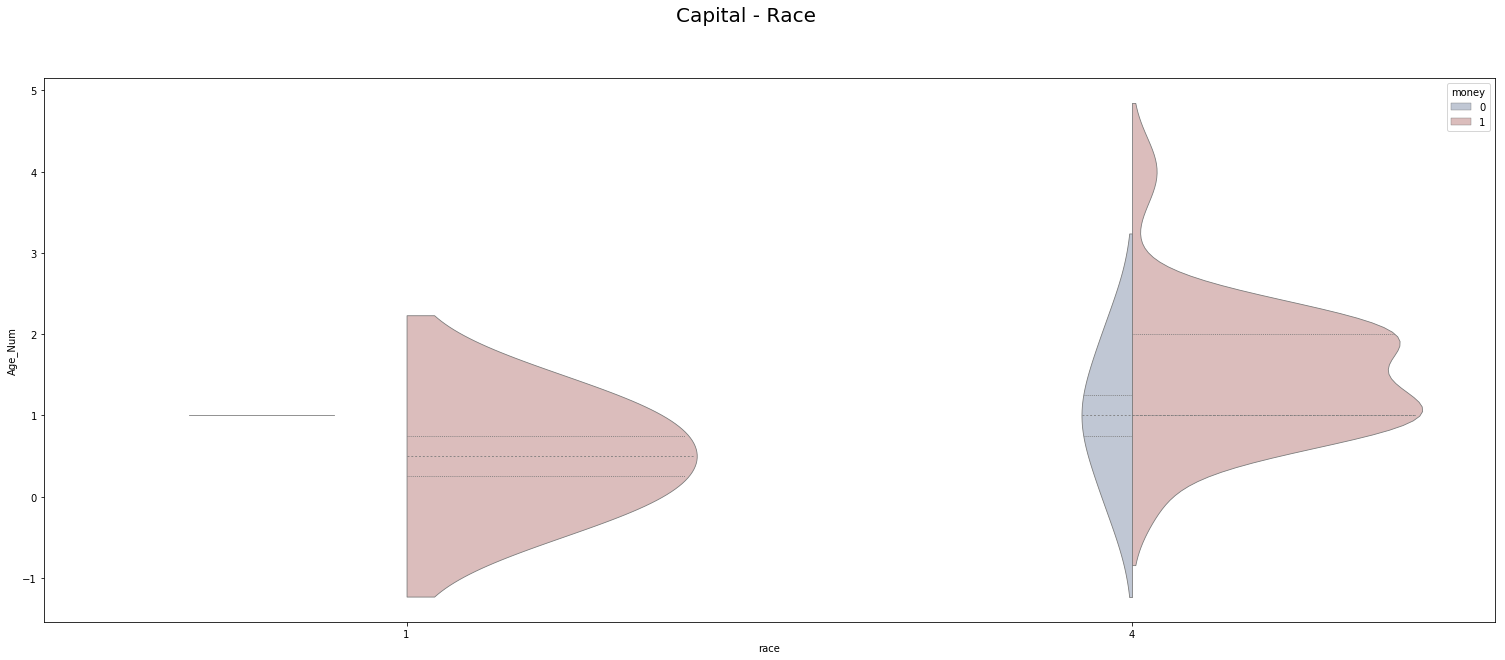

In [39]:
f, (ax) = plt.subplots(1, figsize=(26, 10))
f.suptitle('Capital - Race', fontsize=20)
sns.violinplot(data=best_attributies,
               x="race",
               y="Age_Num",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax)

In [40]:
print(np.unique(data.race)[4])
best_attributies = best_attributies[best_attributies.race==4]

 White


In [41]:
female_money = best_attributies.groupby(by='money').count()

if len(female_money.sex.values)==2:
    female_percent_low = np.round(female_money.sex.values[0]/female_money.sex.sum() * 100,2)
    female_percent_high = np.round(female_money.sex.values[1]/female_money.sex.sum() *100 ,2)
    title = str(female_percent_low) + '% of women gain less than 50K, ' + str(female_percent_high) + '% gain more.'
    print(title)
else:
    print('100% of women gain more than 50K/year')

14.81% of women gain less than 50K, 85.19% gain more.


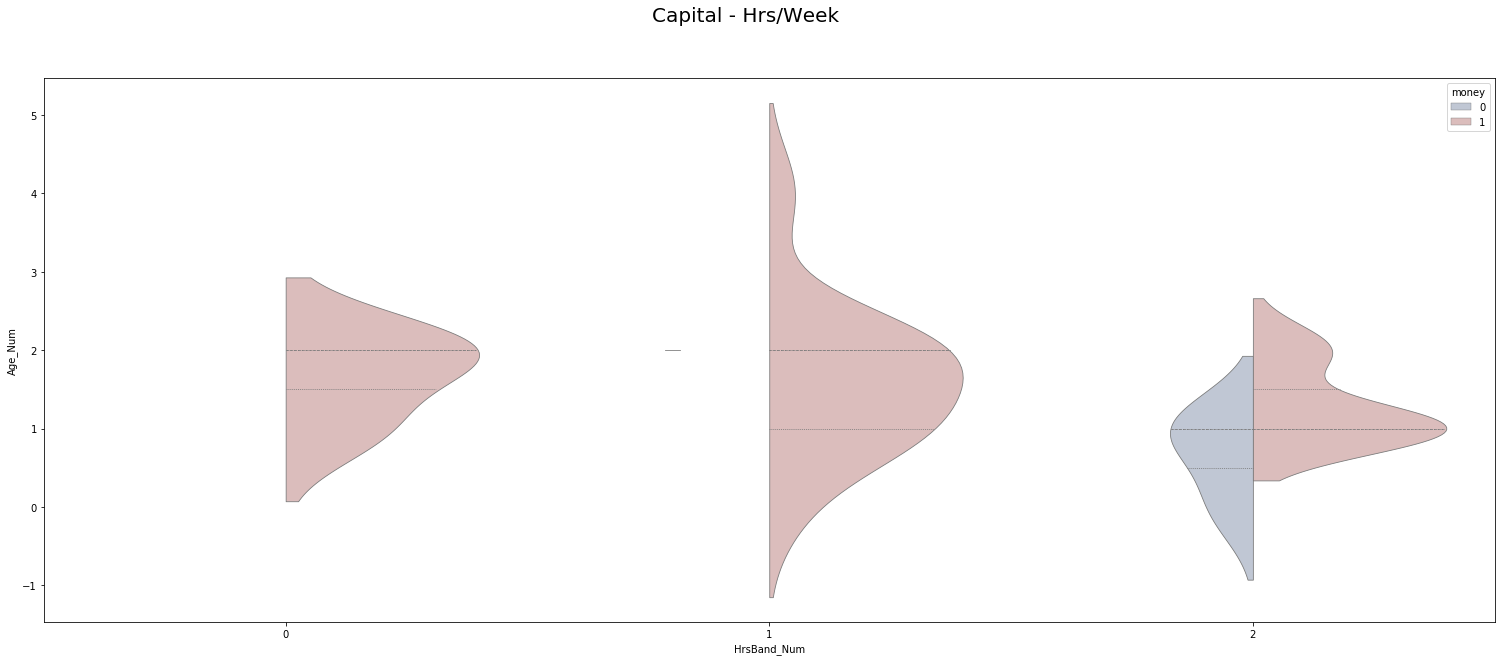

In [42]:
f, (ax) = plt.subplots(1, figsize=(26, 10))
f.suptitle('Capital - Hrs/Week', fontsize=20)
sns.violinplot(data=best_attributies,
               x="HrsBand_Num",
               y="Age_Num",
               inner="quartile",
               hue='money',
               scale="count",
               split=True, palette='vlag', linewidth=.8, ax=ax)

In [43]:
print(np.unique(train.AgeBand)[1])
best_attributies = best_attributies[best_attributies.HrsBand_Num==1]

(31.6, 46.2]


In [44]:
female_money = best_attributies.groupby(by='money').count()

if len(female_money.sex.values)==2:
    female_percent_low = np.round(female_money.sex.values[0]/female_money.sex.sum() * 100,2)
    female_percent_high = np.round(female_money.sex.values[1]/female_money.sex.sum() *100 ,2)
    title = str(female_percent_low) + '% of women gain less than 50K, ' + str(female_percent_high) + '% gain more.'
    print(title)
else:
    print('100% of women gain more than 50K/year')

7.14% of women gain less than 50K, 92.86% gain more.


It would mean, that 92.86& of white wifes who work in local government, spend there between 32 and 46 hours per week, has master degree and present proficiency level are able to gain more than 50K annualy. Obviously there is many ways to manipulate data and they depend on the goal one would achive, I only roughly presented how one could handle with that task.

# 5. Data Processing (2)

In [45]:
## standarization for fnlwgt column
fnlwgt_norm = (train_drop_na.fnlwgt - train_drop_na.fnlwgt.mean())/train_drop_na.fnlwgt.std()
train_drop_na['fnlwgt'] = train_drop_na['fnlwgt'].map(dict(zip(list(train_drop_na.fnlwgt), fnlwgt_norm)))

In [46]:
## standarization for capital-gain column
capital_gain_norm = (train_drop_na['capital-gain'] - train_drop_na['capital-gain'].mean())/train_drop_na['capital-gain'].std()
train_drop_na['capital-gain'] = train_drop_na['capital-gain'].map(dict(zip(list(train_drop_na['capital-gain']), capital_gain_norm)))

In [47]:
## standarization for capital-loss column
capital_loss_norm = (train_drop_na['capital-loss'] - train_drop_na['capital-loss'].mean())/train_drop_na['capital-loss'].std()
train_drop_na['capital-loss'] = train_drop_na['capital-loss'].map(dict(zip(list(train_drop_na['capital-loss']), capital_gain_norm)))

In [48]:
train_drop_na.head()

,fnlwgt,race,sex,capital-gain,capital-loss,money,Relationship_Num,Education_Num,Marital_Status_Num,Workclass_Num,Occupation_Num,HrsBand_Num,Age_Num,Continents_Num
0,-1.065156,4,1,0.142436,1.856257,0,1,2,2,0,1,1,1,2
1,-1.010205,4,1,-0.147514,1.856257,0,0,2,1,2,4,0,2,2
2,0.244651,4,1,-0.147514,1.856257,0,1,0,0,2,6,1,1,2
3,0.425528,2,1,-0.147514,1.856257,0,0,0,1,2,6,1,2,2
4,1.408741,2,0,-0.147514,1.856257,0,0,2,1,2,10,1,0,1


In [49]:
## splitting features and labels
train_only = train_drop_na.drop(columns=['money'])
labels_only = train_drop_na['money']

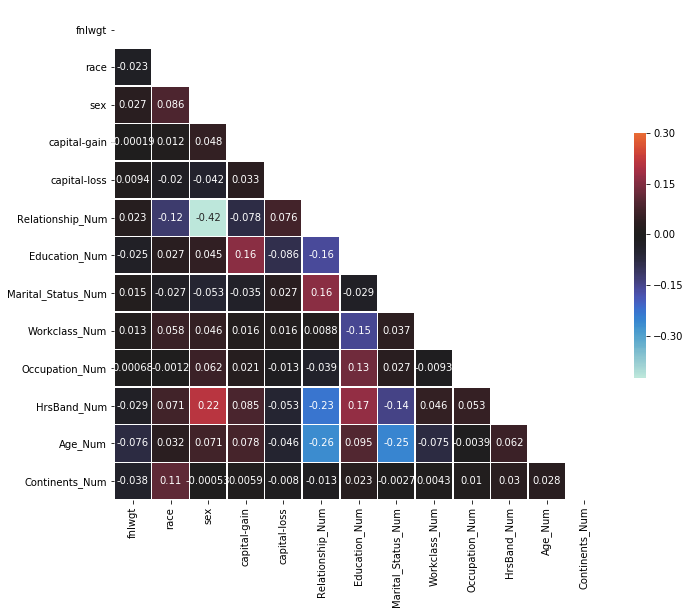

In [50]:
corr = train_only.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cbar=True, annot=True, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As we can see above, mostly correlated features are ones that connect age, sex, relationship, marital-status and education number. It seems to be true, that relationship is correlated with sex somehow - it's hardly possible that husband can be a female. Same with the age and education; there is really small chance that prof-school could be younger than 35 etc. Finally I decided to leave all columns as they are.

In [51]:
## create a dictionary with integers and assined race features
race_dict = dict(zip(list(range(len(data.groupby(by=['race']).count().iloc[:,0]))), list(np.unique(data['race']))))
relationship_dict = dict(zip(list(range(len(train_drop_na.groupby(by=['Relationship_Num']).count().iloc[:,0]))), list(np.unique(data['relationship']))))
education_dict = dict(zip(list([0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 4, 0, 5, 0]), list(np.unique(data['education'])) ))
marital_dict = dict(zip(list([0, 1, 1, 1, 2, 0, 3]), list(np.unique(data['marital-status'])) ))
workclass_dict = dict(zip(list([0, 0, 1, 2, 2, 2, 0, 1]), list(np.unique(data['workclass'])) ))
occupation_dict = dict(zip(list(range(len(data.groupby(by=['occupation']).count()))), list(np.unique(data['occupation']))))
continents_dict = dict(zip(list(range(len(train_drop_na.groupby(by=['Continents_Num']).count().iloc[:,0]))), list(np.unique(train['Continents']))))
print(race_dict)
print(relationship_dict)
print(education_dict)
print(marital_dict)
print(workclass_dict)
print(occupation_dict)
print(continents_dict)

{0: ' Amer-Indian-Eskimo', 1: ' Asian-Pac-Islander', 2: ' Black', 3: ' Other', 4: ' White'}
{0: ' Husband', 1: ' Not-in-family', 2: ' Other-relative', 3: ' Own-child', 4: ' Unmarried'}
{0: ' Some-college', 1: ' Assoc-voc', 2: ' Bachelors', 3: ' Doctorate', 4: ' Masters', 5: ' Prof-school'}
{0: ' Separated', 1: ' Married-spouse-absent', 2: ' Never-married', 3: ' Widowed'}
{0: ' Self-emp-not-inc', 1: ' State-gov', 2: ' Self-emp-inc'}
{0: ' ?', 1: ' Adm-clerical', 2: ' Armed-Forces', 3: ' Craft-repair', 4: ' Exec-managerial', 5: ' Farming-fishing', 6: ' Handlers-cleaners', 7: ' Machine-op-inspct', 8: ' Other-service', 9: ' Priv-house-serv', 10: ' Prof-specialty', 11: ' Protective-serv', 12: ' Sales', 13: ' Tech-support', 14: ' Transport-moving'}
{0: 'A', 1: 'Am-M', 2: 'Am-N', 3: 'Am-S', 4: 'E', 5: 'O'}


In [52]:
## race
race_dummy = pd.get_dummies(train_drop_na.race)
race_dummy = race_dummy.rename(columns=race_dict)
## relationship
relationship_dummy = pd.get_dummies(train_drop_na.Relationship_Num)
relationship_dummy = relationship_dummy.rename(columns=relationship_dict)
## education
education_dummy = pd.get_dummies(train_drop_na.Education_Num)
education_dummy = education_dummy.rename(columns=education_dict)
## marital-status
marital_dummy = pd.get_dummies(train_drop_na.Marital_Status_Num)
marital_dummy = marital_dummy.rename(columns=marital_dict)
## workclass
workclass_dummy = pd.get_dummies(train_drop_na.Workclass_Num)
workclass_dummy = workclass_dummy.rename(columns=workclass_dict)
## occupation
occupation_dummy = pd.get_dummies(train_drop_na.Occupation_Num)
occupation_dummy = occupation_dummy.rename(columns=occupation_dict)
## continents
continents_dummy = pd.get_dummies(train_drop_na.Continents_Num)
continents_dummy = continents_dummy.rename(columns=continents_dict)

In [53]:
concat_list = [train_only, race_dummy, relationship_dummy, education_dummy, marital_dummy, workclass_dummy, occupation_dummy, continents_dummy]

In [54]:
train_with_dummies = pd.concat(concat_list, axis=1)
train_with_dummies = train_with_dummies.drop(columns=['race', 'Relationship_Num', 'Education_Num', 'Marital_Status_Num', 'Workclass_Num', 'Occupation_Num', 'Continents_Num'])

In [55]:
train_with_dummies.head()

,fnlwgt,sex,capital-gain,capital-loss,HrsBand_Num,Age_Num,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,...,Protective-serv,Sales,Tech-support,Transport-moving,A,Am-M,Am-N,Am-S,E,O
0,-1.065156,1,0.142436,1.856257,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-1.010205,1,-0.147514,1.856257,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.244651,1,-0.147514,1.856257,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.425528,1,-0.147514,1.856257,1,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1.408741,0,-0.147514,1.856257,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
X_train, X_val, y_train, y_val = train_test_split(train_with_dummies, labels_only, test_size=0.2)

Now we are ready to start train some models and choose the best one.

# 6. Models, training, prediction and evaluation 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [58]:
classificator_names, acc_values = [], []

In [59]:
## we start with basic classification algorithm that is logistic regression
classificator_names.append('Logistic Regression')

logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train, y_train)
acc_logreg = round(logreg_clf.score(X_val, y_val) * 100, 2)
print (acc_logreg)
acc_values.append(acc_logreg)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


84.77


In [60]:
## next try is taking Logistic Regression model with Stochastic Gradient Decent optimization
classificator_names.append('Logistic Regression with Stochastic Gradient Decent Optimizer')

sgd_log_clf = SGDClassifier(loss='log', random_state=42)
sgd_log_clf.fit(X_train, y_train)
acc_log_sgd = round(sgd_log_clf.score(X_val, y_val) * 100, 2)
print (acc_log_sgd)
acc_values.append(acc_log_sgd)

84.36


In [61]:
## DecisionTreeClassifier with default hyperparameters
classificator_names.append('Decision Tree')

dec_tree_clf = DecisionTreeClassifier(random_state=42)
dec_tree_clf.fit(X_train, y_train)
acc_decision_tree = round(dec_tree_clf.score(X_val, y_val) * 100, 2)
print (acc_decision_tree)
acc_values.append(acc_decision_tree)

79.48


In [62]:
## using GridSearch model we can find best hyperparameters:
classificator_names.append('Tuned Decision Tree')

tuned_dec_tree_clf = DecisionTreeClassifier(random_state=42)
grid_values = {'max_depth': [2, 4, 8, 10, 12], 'max_leaf_nodes': [2, 6, 8, 10, 12]}
grid_clf_acc = GridSearchCV(tuned_dec_tree_clf, param_grid = grid_values, scoring = 'accuracy', cv=5)
grid_clf_acc.fit(X_train, y_train)
acc_grid_decision_tree = round(grid_clf_acc.score(X_val, y_val) * 100, 2)
print('The accuracy using hyperparameters:', grid_clf_acc.best_params_, 'is equal to:', acc_grid_decision_tree)
acc_values.append(acc_grid_decision_tree)

The accuracy using hyperparameters: {'max_depth': 4, 'max_leaf_nodes': 8} is equal to: 84.65


In [63]:
## RandomForestClassifier with default hyperparameters
classificator_names.append('Random Forest')

rand_for_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rand_for_clf.fit(X_train, y_train)
acc_random_forest = round(rand_for_clf.score(X_val, y_val) * 100, 2)
print (acc_random_forest)
acc_values.append(acc_random_forest)

82.5


In [64]:
## again we are looking for best parameters
classificator_names.append('Tuned Random Forest')

tuned_rand_for_clf = RandomForestClassifier(random_state=42, n_estimators=100)
grid_values = {'max_depth': [5, 10, 15], 'max_leaf_nodes': [8, 12, 16]}
grid_clf_acc = GridSearchCV(tuned_rand_for_clf, param_grid = grid_values, scoring = 'accuracy', cv=5)
grid_clf_acc.fit(X_train, y_train)
acc_grid_random_forest = round(grid_clf_acc.score(X_val, y_val) * 100, 2)
print('The accuracy using hyperparameters:', grid_clf_acc.best_params_, 'is equal to:', acc_grid_random_forest)
acc_values.append(acc_grid_random_forest)

The accuracy using hyperparameters: {'max_depth': 5, 'max_leaf_nodes': 16} is equal to: 84.44


In [65]:
## Support Vector Machine with defauls hyperparamteres
classificator_names.append('Support Vector Machine')

svm_clf = SVC(random_state=42, gamma='scale')
svm_clf.fit(X_train, y_train)
acc_svm = round(svm_clf.score(X_val, y_val) * 100, 2)
print(acc_svm)
acc_values.append(acc_svm)

85.12


In [66]:
## SVM with GridSearch tuning
classificator_names.append('Tuned Support Vector Machine')

tuned_svm_clf = SVC(kernel='rbf', random_state=42, gamma='scale')
grid_values = {'C': [1, 10, 100]}
grid_clf_acc = GridSearchCV(tuned_svm_clf, param_grid = grid_values, scoring = 'accuracy', cv=5)
grid_clf_acc.fit(X_train, y_train)
acc_grid_svm = round(grid_clf_acc.score(X_val, y_val) * 100, 2)
print('The accuracy using hyperparameters:', grid_clf_acc.best_params_, 'is equal to:', acc_grid_svm)
acc_values.append(acc_grid_svm)

The accuracy using hyperparameters: {'C': 10} is equal to: 84.83


In [67]:
## SVM with SGD Optimizer
classificator_names.append('Support Vector Machine with SGD Optimizer')

sgd_svm_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_svm_clf.fit(X_train, y_train)
acc_svm_sgd = round(sgd_svm_clf.score(X_val, y_val) * 100, 2)
print (acc_svm_sgd)
acc_values.append(acc_svm_sgd)

84.88


In [68]:
## K-Nearest Neighbors
classificator_names.append('K-Nearest Neighbors')

knn_clf = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knn_clf.fit(X_train, y_train)
acc_knn = round(knn_clf.score(X_val, y_val) * 100, 2)
print(acc_knn)
acc_values.append(acc_knn)

82.49


In [69]:
## Gaussian Naive Bayes
classificator_names.append('Gaussian Naive Bayes')

gauss_clf = GaussianNB()
gauss_clf.fit(X_train, y_train)   
acc_gauss = round(gauss_clf.score(X_val, y_val) * 100, 2)
print (acc_gauss)
acc_values.append(acc_gauss)

65.28


Below table presents all trained models with accuracy results.

In [70]:
classifiers = pd.DataFrame({
    'Model': classificator_names, 'Score': acc_values
})
classifiers = classifiers.sort_values(by='Score', ascending=False).reset_index(drop=True)
classifiers

,Model,Score
0,Support Vector Machine,85.12
1,Support Vector Machine with SGD Optimizer,84.88
2,Tuned Support Vector Machine,84.83
3,Logistic Regression,84.77
4,Tuned Decision Tree,84.65
5,Tuned Random Forest,84.44
6,Logistic Regression with Stochastic Gradient D...,84.36
7,Random Forest,82.50
8,K-Nearest Neighbors,82.49
9,Decision Tree,79.48


Below there are results from boosting models, that I've tried to get better score.

In [71]:
boosting_list, boosting_acc = [], []

In [72]:
boosting_list.append('Gradient Boosting Classifier')

gbrt = GradientBoostingClassifier(max_depth = 2, n_estimators = 150, learning_rate = .2)
gbrt.fit(X_train, y_train)
acc_gbrt = round(gbrt.score(X_val, y_val) * 100, 2)
print(acc_gbrt)
boosting_acc.append(acc_gbrt)

85.55


In [73]:
boosting_list.append('AdaBoost Classifier')

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2, max_leaf_nodes=9), n_estimators = 150, algorithm = 'SAMME.R', learning_rate = 0.2)
ada_clf.fit(X_train, y_train)
acc_ada = round(ada_clf.score(X_val, y_val) * 100, 2)
print(acc_ada)
boosting_acc.append(acc_ada)

85.87


In [74]:
boosting_list.append('XGBoost Classifier')

model = xgb.XGBClassifier(objective='binary:logistic', learning_rate= 1, colsample_bynode= 0.8, subsample= 0.8, num_parallel_tree=100, eval_metric = 'auc')
model.fit(X_train, y_train)
acc_xgb = round(model.score(X_val, y_val) * 100, 2)
print(acc_xgb)
boosting_acc.append(acc_xgb)

85.77


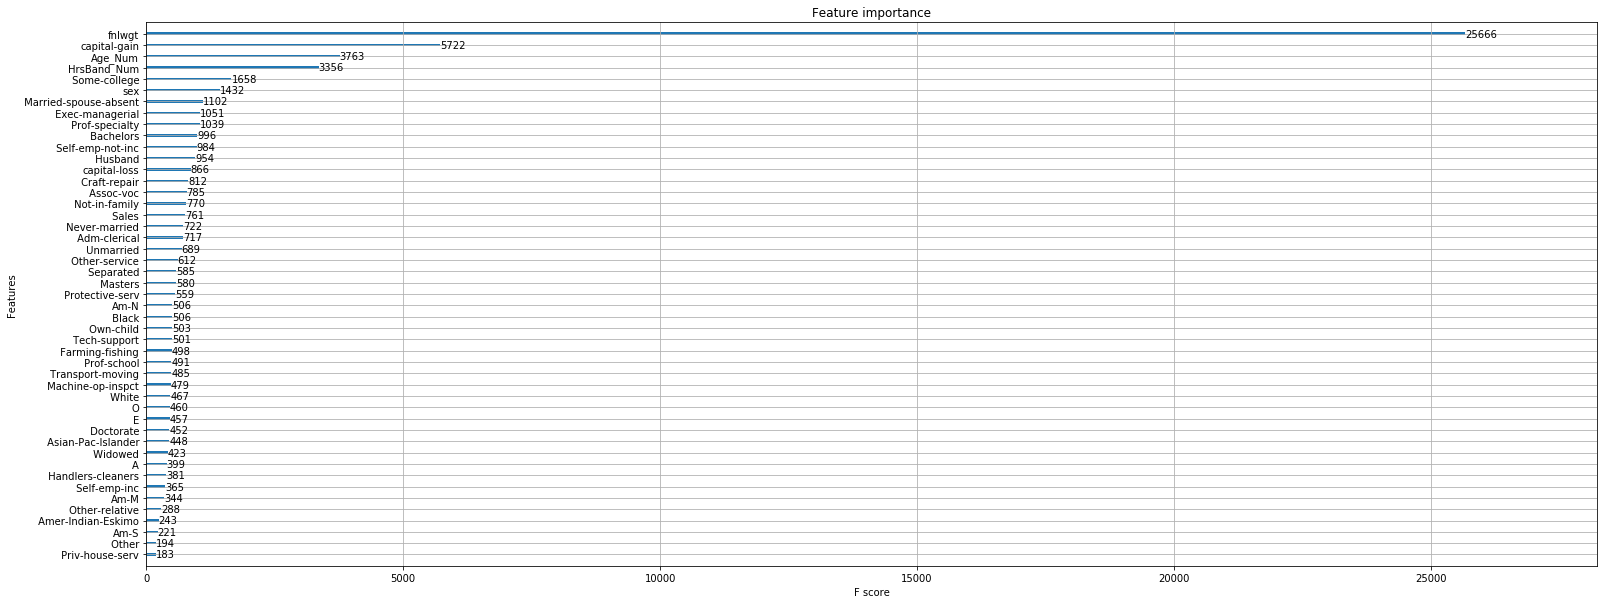

In [75]:
## for XGBoost we can create plot of most important features
f, ax = plt.subplots(1, figsize=(26, 10))
xgb.plot_importance(model, importance_type='weight', ax=ax)

In [76]:
boosting_list.append('Bagging Classifier')

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16), n_estimators = 500, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
acc_bag_clf = round(bag_clf.score(X_val, y_val) * 100, 2)
print(acc_bag_clf)
boosting_acc.append(acc_bag_clf)

83.97


In [77]:
boosting_classifiers = pd.DataFrame({
    'Model': boosting_list, 'Score': boosting_acc
})
boosting_classifiers = boosting_classifiers.sort_values(by='Score', ascending=False).reset_index(drop=True)
boosting_classifiers

,Model,Score
0,AdaBoost Classifier,85.87
1,XGBoost Classifier,85.77
2,Gradient Boosting Classifier,85.55
3,Bagging Classifier,83.97


# 7. adult_test file - processing and testing

In [78]:
test_data = pd.read_csv('../input/adult-census-income-data/adult_test.csv', names=names)
test_data = test_data.rename(columns={'>50K, <=50K.': 'money'})
test_data = test_data.iloc[1:]

In [79]:
train_on_test = test_data.drop(columns=['relationship', 'education', 'education-num', 'marital-status', 'workclass'])
test_labels = test_data['money']

In [80]:
train_on_test['Relationship_Num'] = test_data['relationship'].map(dict(zip(list(np.unique(test_data['relationship'])), [0, 1, 2, 3, 4, 0])))
train_on_test['Education_Num'] = test_data['education'].map(dict(zip(list(np.unique(test_data['education'])), [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 4, 0, 5, 0])))
train_on_test['Marital_Status_Num'] = test_data['marital-status'].map(dict(zip(list(np.unique(test_data['marital-status'])), [0, 1, 1, 1, 2, 0, 3])))
train_on_test['Workclass_Num'] = test_data['workclass'].map(dict(zip(list(np.unique(test_data['workclass'])), [np.nan, 0, 0, 1, 2, 2, 2, 0, 1])))
train_on_test['sex'] = test_data['sex'].map(dict(zip(list(np.unique(test_data['sex'])), [0, 1])))  #0 - male, 1 - female
train_on_test['race'] = test_data['race'].map(dict(zip(list(np.unique(test_data['race'])), list(range(len(test_data.groupby(by=['race']).count().iloc[:,0]))))))
train_on_test['Occupation_Num'] = test_data['occupation'].map(dict(zip(list(np.unique(test_data['occupation'])), list(range(len(test_data.groupby(by=['occupation']).count().iloc[:,0]))))))
train_on_test['Occupation_Num'] = train_on_test['Occupation_Num'].replace({0: np.nan})
train_on_test['HrsBand'] = pd.cut(test_data['hours-per-week'], 5)
train_on_test['HrsBand_Num'] = pd.cut(test_data['hours-per-week'], 5, labels=list(range(len(train_on_test.groupby(by=['HrsBand']).count().iloc[:,0]))))
train_on_test['AgeBand'] = pd.cut(test_data.age.astype('int32'), 5)  ## in the test file values of age column have string type
train_on_test['Age_Num'] = pd.cut(test_data.age.astype('int32'), 5, labels=list(range(len(train_on_test.groupby(by=['AgeBand']).count().iloc[:,0]))))

In [81]:
train_on_test['Continents'] = train_on_test['native-country'].map(native_countries_dictionary)  
train_on_test['Continents_Num'] = train_on_test['Continents'].map(dict(zip(list(np.unique(train_on_test['Continents'])), list(range(len(train_on_test.groupby(by=['Continents']).count().iloc[:,0]))))))    

In [82]:
train_on_test_drop = train_on_test.drop(columns=['occupation', 'native-country', 'Continents', 'AgeBand', 'age', 'hours-per-week', 'HrsBand'])

In [83]:
train_on_test_drop_na = train_on_test_drop.dropna()
print('There is', len(train_on_test_drop) - len(train_on_test_drop_na),"Nan rows in the test dataset, it's", np.round((len(train_on_test_drop) - len(train_on_test_drop_na))/len(train_on_test_drop) * 100, 2),'% that needs to be deleted.')

There is 966 Nan rows in the test dataset, it's 5.93 % that needs to be deleted.


In [84]:
train_on_test_drop_na.money = train_on_test_drop_na.money.map(dict(zip(list(np.unique(test_labels)), [0, 1])))
train_on_test_drop_na = train_on_test_drop_na.astype('int32')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [85]:
## standarization for fnlwgt column
fnlwgt_norm = (train_on_test_drop_na.fnlwgt - train_on_test_drop_na.fnlwgt.mean())/train_on_test_drop_na.fnlwgt.std()
train_on_test_drop_na['fnlwgt'] = train_on_test_drop_na['fnlwgt'].map(dict(zip(list(train_on_test_drop_na.fnlwgt), fnlwgt_norm)))
## standarization for capital-gain column
capital_gain_norm = (train_on_test_drop_na['capital-gain'] - train_on_test_drop_na['capital-gain'].mean())/train_on_test_drop_na['capital-gain'].std()
train_on_test_drop_na['capital-gain'] = train_on_test_drop_na['capital-gain'].map(dict(zip(list(train_on_test_drop_na['capital-gain']), capital_gain_norm)))
## standarization for capital-loss column
capital_loss_norm = (train_on_test_drop_na['capital-loss'] - train_on_test_drop_na['capital-loss'].mean())/train_on_test_drop_na['capital-loss'].std()
train_on_test_drop_na['capital-loss'] = train_on_test_drop_na['capital-loss'].map(dict(zip(list(train_on_test_drop_na['capital-loss']), capital_gain_norm)))

In [86]:
## race
test_race_dummy = pd.get_dummies(train_on_test_drop_na.race)
test_race_dummy = test_race_dummy.rename(columns=race_dict)
## relationship
test_relationship_dummy = pd.get_dummies(train_on_test_drop_na.Relationship_Num)
test_relationship_dummy = test_relationship_dummy.rename(columns=relationship_dict)
## education
test_education_dummy = pd.get_dummies(train_on_test_drop_na.Education_Num)
test_education_dummy = test_education_dummy.rename(columns=education_dict)
## marital-status
test_marital_dummy = pd.get_dummies(train_on_test_drop_na.Marital_Status_Num)
test_marital_dummy = test_marital_dummy.rename(columns=marital_dict)
## workclass
test_workclass_dummy = pd.get_dummies(train_on_test_drop_na.Workclass_Num)
test_workclass_dummy = test_workclass_dummy.rename(columns=workclass_dict)
## occupation
test_occupation_dummy = pd.get_dummies(train_on_test_drop_na.Occupation_Num)
test_occupation_dummy = test_occupation_dummy.rename(columns=occupation_dict)
## continents
test_continents_dummy = pd.get_dummies(train_on_test_drop_na.Continents_Num)
test_continents_dummy = test_continents_dummy.rename(columns=continents_dict)

In [87]:
train_on_test_only = train_on_test_drop_na.drop(columns=['money'])
test_labels_only = train_on_test_drop_na['money']

In [88]:
test_concat_list = [train_on_test_only, test_race_dummy, test_relationship_dummy, test_education_dummy, test_marital_dummy, test_workclass_dummy, test_occupation_dummy, test_continents_dummy]

In [89]:
train_on_test_with_dummies = pd.concat(test_concat_list, axis=1)
train_on_test_with_dummies = train_on_test_with_dummies.drop(columns=['race', 'Relationship_Num', 'Education_Num', 'Marital_Status_Num', 'Workclass_Num', 'Occupation_Num', 'Continents_Num'])

In [90]:
print(len(train_on_test_with_dummies.columns)==len(train_with_dummies.columns)) ## check if number of columns in train and test datasets are same

True


In [91]:
print('We can see that boosting classifiers work better during the training than the previous ones, the best boosting classifier is', 
      boosting_classifiers.values[0][0],'while the worst regular one is',classifiers.values[len(classifiers)-1][0],'. Let us check how they behave on the test one.')

We can see that boosting classifiers work better during the training than the previous ones, the best boosting classifier is AdaBoost Classifier while the worst regular one is Gaussian Naive Bayes . Let us check how they behave on the test one.


In [92]:
test_acc_ada = round(ada_clf.score(train_on_test_with_dummies, test_labels_only) * 100, 2)
print('Accuracy for AdaBoost Classifier on the test set is:', test_acc_ada)
test_acc_gauss = round(gauss_clf.score(train_on_test_with_dummies, test_labels_only) * 100, 2)
print ('Accuracy for Gaussian Naive Bayes on the test set is:', test_acc_gauss)

Accuracy for AdaBoost Classifier on the test set is: 80.34
Accuracy for Gaussian Naive Bayes on the test set is: 56.51


As excpected there is huge difference on accuracy for two above models. However, it does not mean that AdaBoost Classifier is the best possible here. Once we pass from the training set onto the test one, some factors, like overfitting, may occur. Due to computational and data processing capacity on my home workstation I could not find all best possible parameters during GridSearch tuning. Finally, I guess there are better ways of preparing data, that could also improve final results. I used tools I have already learned, so that maybe this kernel will be helpful somehow. Once I tried run all models on the test data, the best accuracy I got from the XGBoost model, which (again, as excpected) should reduce overfitting, is shown below.

In [93]:
test_acc_gbrt = round(gbrt.score(train_on_test_with_dummies, test_labels_only) * 100, 2)
print('Best accuracy using XGBoost model:',test_acc_gbrt)

Best accuracy using XGBoost model: 80.93
